# Exploratory Data Analysis fo Heart Hisease data

### Import libraries ...

In [174]:
# import the libraries
%matplotlib inline

import pandas as pnd
import numpy as nmp
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns
# apply style to all the charts
sns.set_style('whitegrid')

### Load the data: No header row in data file!

In [175]:
df_clv = pnd.read_csv('C:\\Users\\hbenamor\\Desktop\\uc-heartdisease-datafolder\\processed.cleveland.data', header = None)
df_hds = df_clv

In [178]:
# Missing values by column: No missing values!
print(df_hds.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [179]:
# Rows with missing values: None!
df_hds[df_hds.isnull().any(axis=1)]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13


In [180]:
# Rename columns
#df_clv.rename(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'])
df_hds.columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "goal"]
df_hds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')

In [181]:
df_hds.values

array([[63.0, 1.0, 1.0, ..., '0.0', '6.0', 0],
       [67.0, 1.0, 4.0, ..., '3.0', '3.0', 2],
       [67.0, 1.0, 4.0, ..., '2.0', '7.0', 1],
       ...,
       [57.0, 1.0, 4.0, ..., '1.0', '7.0', 3],
       [57.0, 0.0, 2.0, ..., '1.0', '3.0', 1],
       [38.0, 1.0, 3.0, ..., '?', '3.0', 0]], dtype=object)

In [182]:
df_hds.shape

(303, 14)

In [183]:
df_hds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [184]:
df_hds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [187]:
# Some 'goal' values exceed 1 whereas they ar assumed to be either 0 or 1. They are set back to 1.
# 'thal' and 'ca' have bad values '?'. They are set to default "no issue" values for each.
df_hds["goal"] = nmp.where(df_hds['goal'] >= 1, 1, df_hds['goal']) 
df_hds["ca"] = nmp.where(df_hds['ca']=='?', '0.0', df_hds['ca'])
df_hds["thal"] = nmp.where(df_hds['thal']=='?', '3.0', df_hds['thal'])

In [188]:
df_hds.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
goal          int64
dtype: object

In [189]:
df_hds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [190]:
# sex, cp, fbs, restecg, exang, slope, goal are not numerical: transform their values.
df_mod = df_hds.copy()
#df_mod['sex']
# sex
df_mod["sex"] = nmp.where(df_hds['sex'] == 1.0, 'M', 'F')
df_mod['sex']
# cp
df_mod["cp"] = nmp.where((df_hds['cp'] == 1), 'typ_ang', df_mod['cp'])
df_mod["cp"] = nmp.where((df_hds['cp'] == 2), 'atyp_ang', df_mod['cp'])
df_mod["cp"] = nmp.where((df_hds['cp'] == 3), 'non_ang', df_mod['cp'])
df_mod["cp"] = nmp.where((df_hds['cp'] == 4), 'asymp', df_mod['cp'])
df_mod['cp']
# fbs
df_mod["fbs"] = nmp.where(df_hds['fbs'] > 0.120, 'High', 'Low')
df_mod['fbs']
# restecg
df_mod["restecg"] = nmp.where((df_hds['restecg'] == 0), 'Normal', df_mod['restecg'])
df_mod["restecg"] = nmp.where((df_hds['restecg'] == 1), 'ST-T-Abnormal', df_mod['restecg'])
df_mod["restecg"] = nmp.where((df_hds['restecg'] == 2), 'LeftVent-hyper', df_mod['restecg'])
df_mod['restecg']
# exang
df_mod["exang"] = nmp.where(df_hds['exang'] == 1.0, 'Yes', df_mod['exang'])
df_mod["exang"] = nmp.where(df_hds['exang'] == 0.0, 'No', df_mod['exang'])
df_mod['exang']
# restecg
df_mod["slope"] = nmp.where((df_hds['slope'] == 1), 'unslope', df_mod['slope'])
df_mod["slope"] = nmp.where((df_hds['slope'] == 2), 'noslope', df_mod['slope'])
df_mod["slope"] = nmp.where((df_hds['slope'] == 3), 'dnslope', df_mod['slope'])
df_mod['slope']
# fbs
df_mod["goal"] = nmp.where(df_hds['goal'] < 0.5, 'less50%_diamnarrow', 'More50%_diamnarrow')
df_mod['goal']
df_mod.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [191]:
df_mod.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
goal         object
dtype: object

##### Numerical variables distributions.

count    303.0
mean      54.0
std        9.0
min       29.0
25%       48.0
50%       56.0
75%       61.0
max       77.0
Name: age, dtype: float64


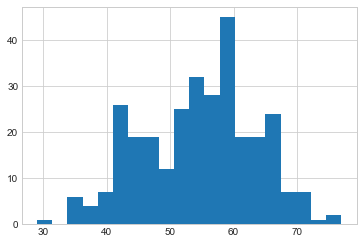

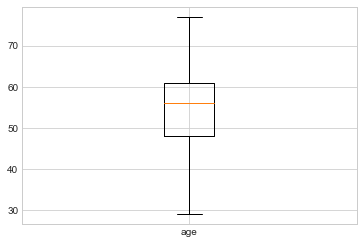

In [192]:
# Analyze age distribution

# Hisotgram
print(df_mod['age'].describe().round())
plt.hist(df_mod['age'], bins=20)
plt.show()
# Box plot: No outliers!
plt.boxplot(df_mod['age'])
plt.xticks([1], ['age'], rotation='horizontal')
plt.show()

count    303.0
mean     132.0
std       18.0
min       94.0
25%      120.0
50%      130.0
75%      140.0
max      200.0
Name: trestbps, dtype: float64


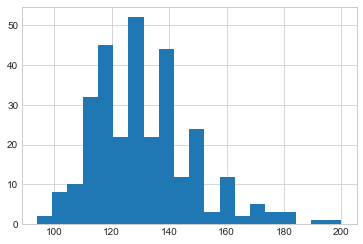

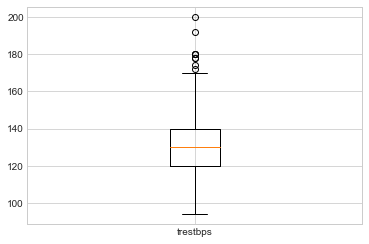

In [193]:
# Analyze resting blood pressure distribution

# Hisotgram
print(df_mod['trestbps'].describe().round())
plt.hist(df_mod['trestbps'], bins=20)
plt.show()
# Box plot: 6 outliers!
plt.boxplot(df_mod['trestbps'])
plt.xticks([1], ['trestbps'], rotation='horizontal')
plt.show()

count    303.0
mean     247.0
std       52.0
min      126.0
25%      211.0
50%      241.0
75%      275.0
max      564.0
Name: chol, dtype: float64


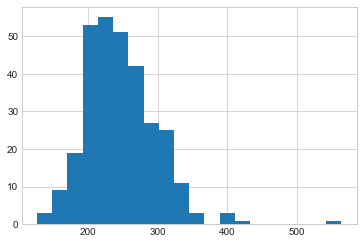

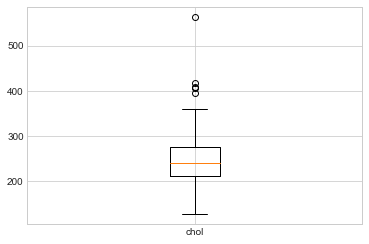

In [194]:
# Analyze cholesterol distribution

# Hisotgram
print(df_mod['chol'].describe().round())
plt.hist(df_mod['chol'], bins=20)
plt.show()
# Box plot: 4 outliers!
plt.boxplot(df_mod['chol'])
plt.xticks([1], ['chol'], rotation='horizontal')
plt.show()

count    303.0
mean     150.0
std       23.0
min       71.0
25%      134.0
50%      153.0
75%      166.0
max      202.0
Name: thalach, dtype: float64


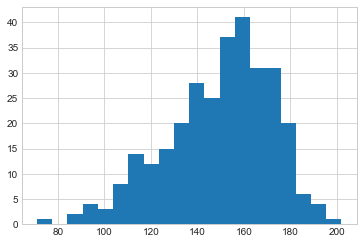

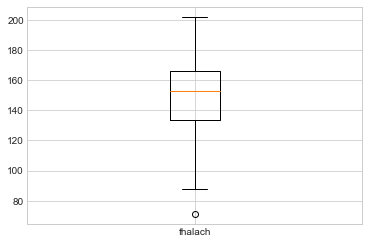

In [195]:
# Analyze maximum heart rate achieved distribution

# Hisotgram
print(df_mod['thalach'].describe().round())
plt.hist(df_mod['thalach'], bins=20)
plt.show()
# Box plot: One outlier!
plt.boxplot(df_mod['thalach'])
plt.xticks([1], ['thalach'], rotation='horizontal')
plt.show()

count    303.0
mean       1.0
std        1.0
min        0.0
25%        0.0
50%        1.0
75%        2.0
max        6.0
Name: oldpeak, dtype: float64


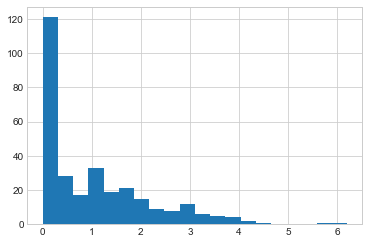

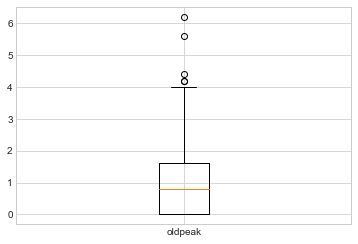

In [196]:
# Analyze ST depression induced by exercice distribution

# Hisotgram
print(df_mod['oldpeak'].describe().round())
plt.hist(df_mod['oldpeak'], bins=20)
plt.show()
# Box plot: 4 outliers!
plt.boxplot(df_mod['oldpeak'])
plt.xticks([1], ['oldpeak'], rotation='horizontal')
plt.show()

##### Categorical variables distributions

M    206
F     97
Name: sex, dtype: int64


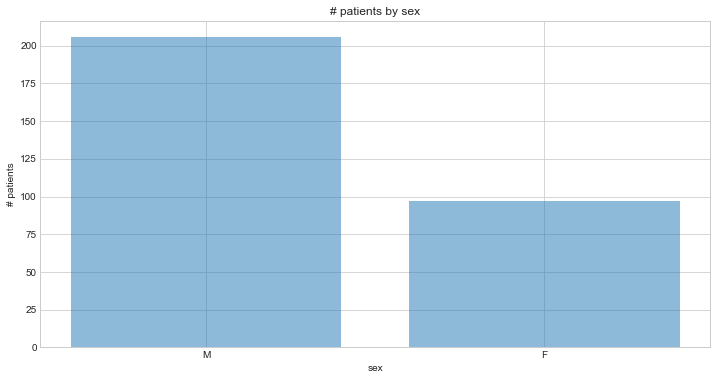

In [197]:
# Analyze sex distribution
print(df_mod['sex'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by sex')
plt.xlabel('sex')
plt.ylabel('# patients')

labels = df_mod['sex'].value_counts().index
values = df_mod['sex'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

asymp       144
non_ang      86
atyp_ang     50
typ_ang      23
Name: cp, dtype: int64


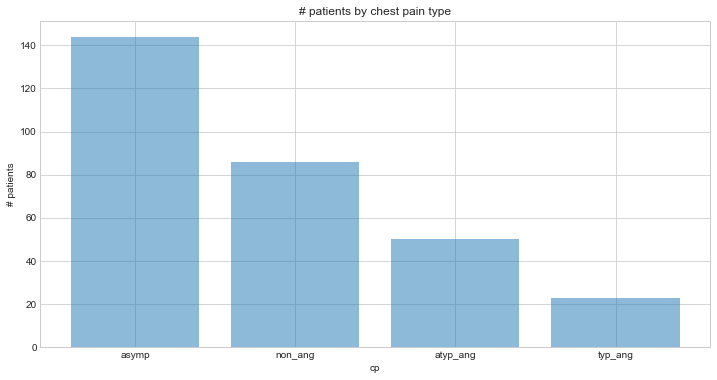

In [198]:
# Analyze  chest pain type distribution
print(df_mod['cp'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by chest pain type')
plt.xlabel('cp')
plt.ylabel('# patients')

labels = df_mod['cp'].value_counts().index
values = df_mod['cp'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

Low     258
High     45
Name: fbs, dtype: int64


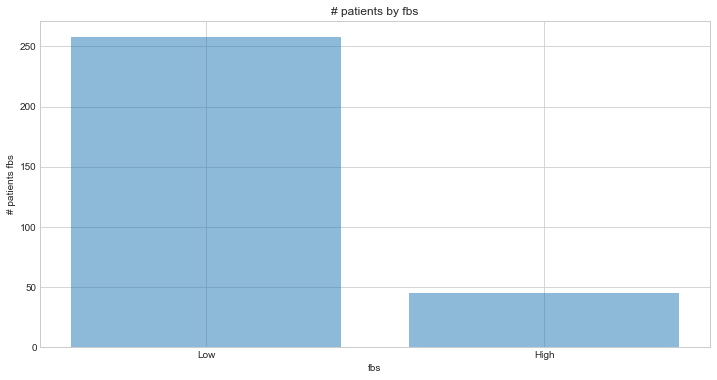

In [199]:
# Analyze fasting blood sugar distribution
print(df_mod['fbs'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by fbs')
plt.xlabel('fbs')
plt.ylabel('# patients fbs')

labels = df_mod['fbs'].value_counts().index
values = df_mod['fbs'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

Normal            151
LeftVent-hyper    148
ST-T-Abnormal       4
Name: restecg, dtype: int64


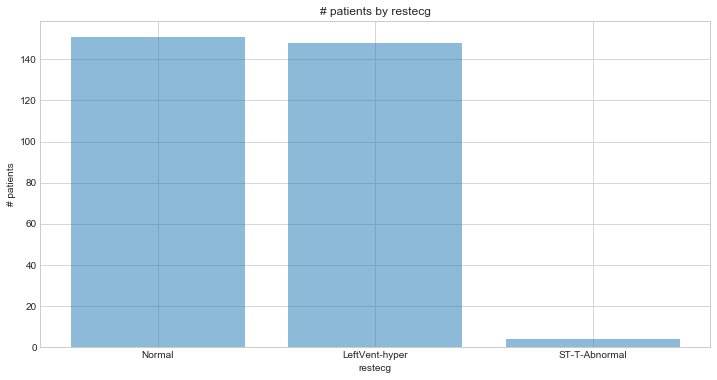

In [200]:
# Analyze resting electrocardiographic distribution
print(df_mod['restecg'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by restecg')
plt.xlabel('restecg')
plt.ylabel('# patients')

labels = df_mod['restecg'].value_counts().index
values = df_mod['restecg'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

No     204
Yes     99
Name: exang, dtype: int64


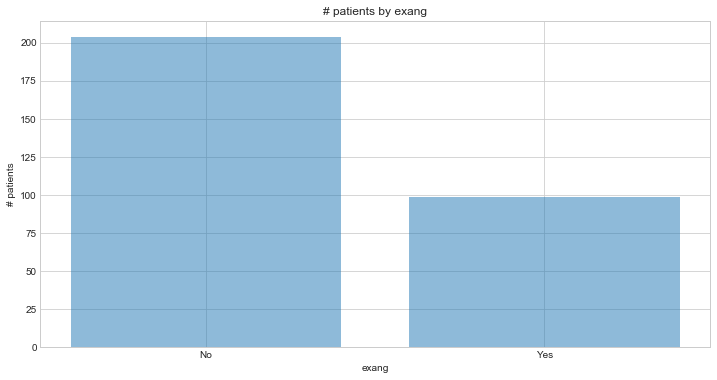

In [201]:
# Analyze exercise induced angina distribution
print(df_mod['exang'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by exang')
plt.xlabel('exang')
plt.ylabel('# patients')

labels = df_mod['exang'].value_counts().index
values = df_mod['exang'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

unslope    142
noslope    140
dnslope     21
Name: slope, dtype: int64


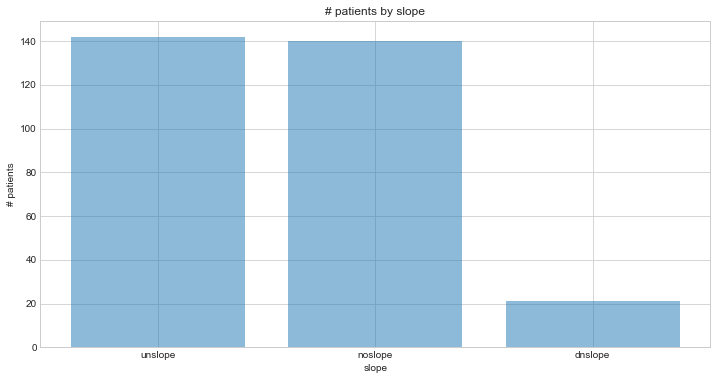

In [202]:
# Analyze slope of the peak exercise segment distribution
print(df_mod['slope'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by slope')
plt.xlabel('slope')
plt.ylabel('# patients')

labels = df_mod['slope'].value_counts().index
values = df_mod['slope'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


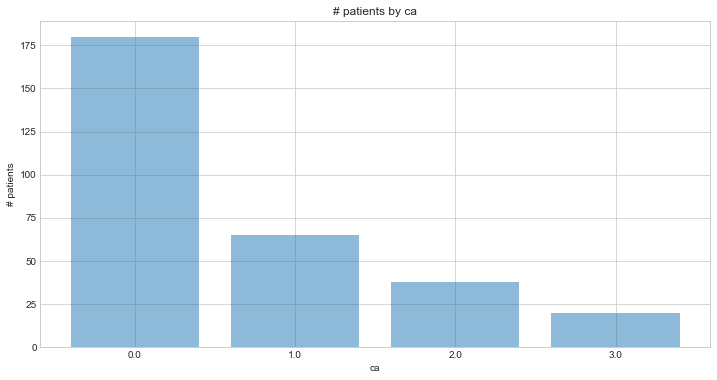

In [203]:
# Analyze number of major vessels coloured bu fluoroscopy distribution
print(df_mod['ca'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by ca')
plt.xlabel('ca')
plt.ylabel('# patients')

labels = df_mod['ca'].value_counts().index
values = df_mod['ca'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64


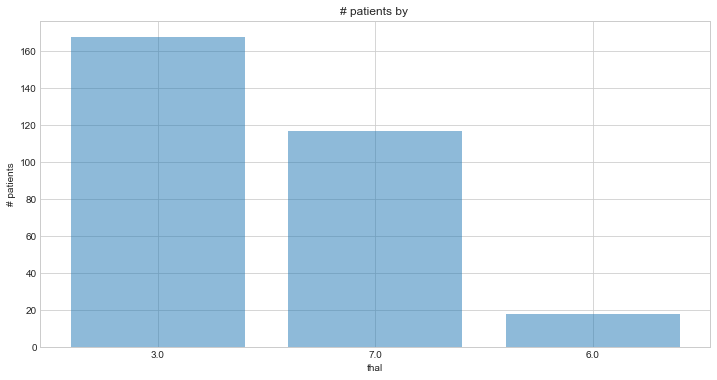

In [204]:
# Analyze Thalium stress test distribution
print(df_mod['thal'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by ')
plt.xlabel('thal')
plt.ylabel('# patients')

labels = df_mod['thal'].value_counts().index
values = df_mod['thal'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

less50%_diamnarrow    164
More50%_diamnarrow    139
Name: goal, dtype: int64


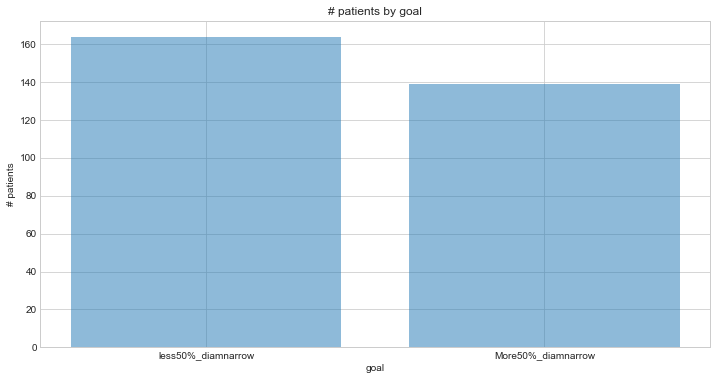

In [205]:
# Analyze  goal distribution
print(df_mod['goal'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by goal')
plt.xlabel('goal')
plt.ylabel('# patients')

labels = df_mod['goal'].value_counts().index
values = df_mod['goal'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

##### Correlation

In [206]:
# numerical variables correlations are not strong.
df_mod.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.284946,0.208950,-0.393806,0.203805
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171
chol,0.208950,0.130120,1.000000,-0.003432,0.046564
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000


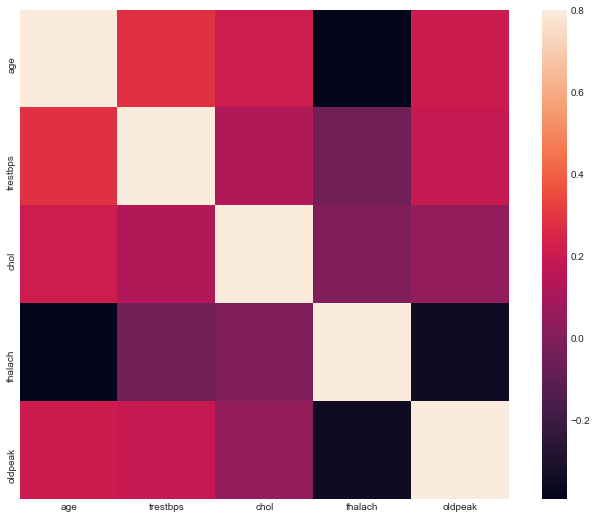

In [207]:
# heatmap
corrmat = df_mod.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

##### Multiple variables visualization: goal vs. numerical variables.

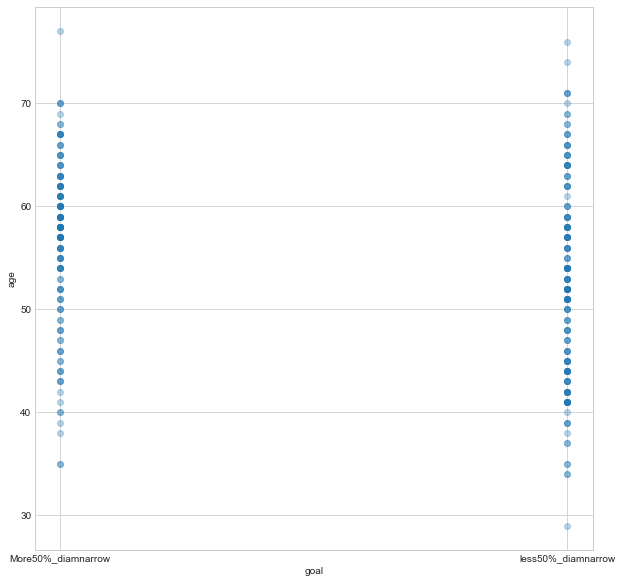

In [208]:
# Visualization of the correlation between goal x age

plt.figure(figsize=(10,10))
plt.xlabel('goal')
plt.ylabel('age')


plt.plot( df_mod['goal'], df_mod['age'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


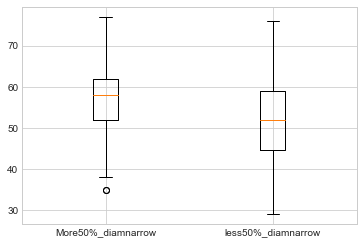

In [209]:
# Box plot to show the distribution between age x goal
values = []
labels = []
for goal in sorted(df_mod['goal'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['goal']==goal]['age'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

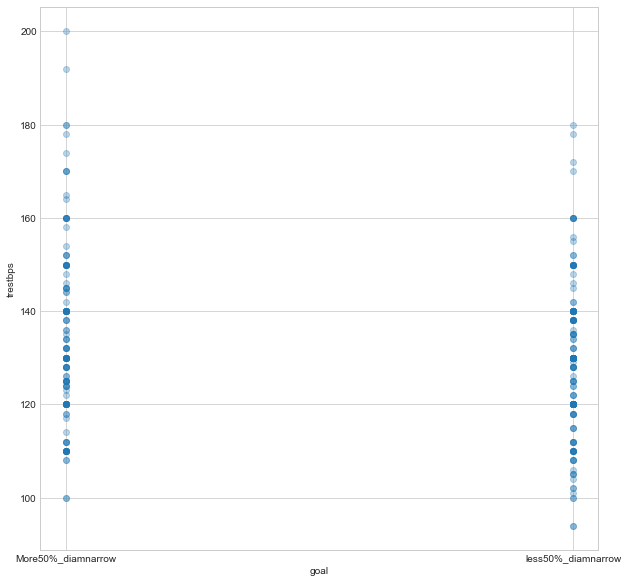

In [210]:
# Visualization of the correlation between goal x trestbps

plt.figure(figsize=(10,10))
plt.xlabel('goal')
plt.ylabel('trestbps')


plt.plot( df_mod['goal'], df_mod['trestbps'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


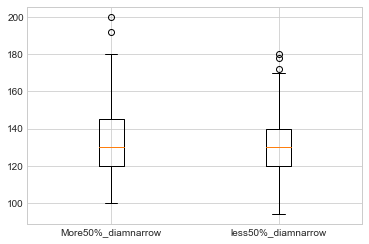

In [211]:
# Box plot to show the distribution between trestbps x goal
values = []
labels = []
for goal in sorted(df_mod['goal'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['goal']==goal]['trestbps'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

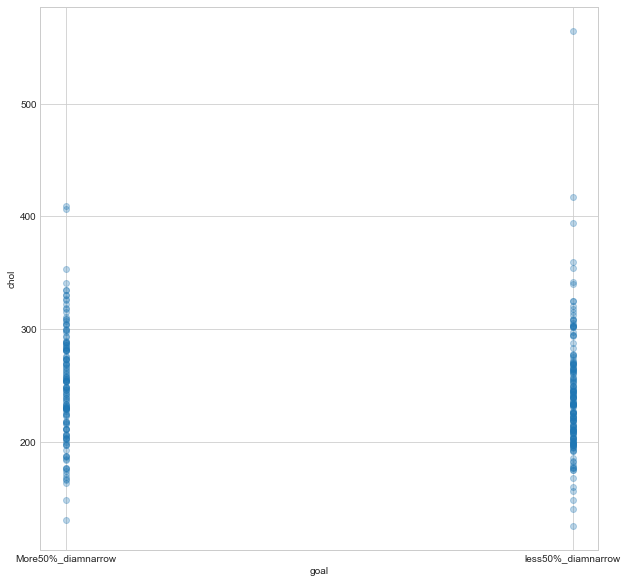

In [212]:
# Visualization of the correlation between goal x cholesterol

plt.figure(figsize=(10,10))
plt.xlabel('goal')
plt.ylabel('chol')


plt.plot( df_mod['goal'], df_mod['chol'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


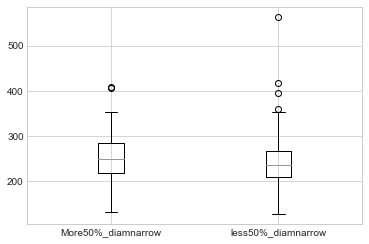

In [213]:
# Box plot to show the distribution between chol x goal
values = []
labels = []
for goal in sorted(df_mod['goal'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['goal']==goal]['chol'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

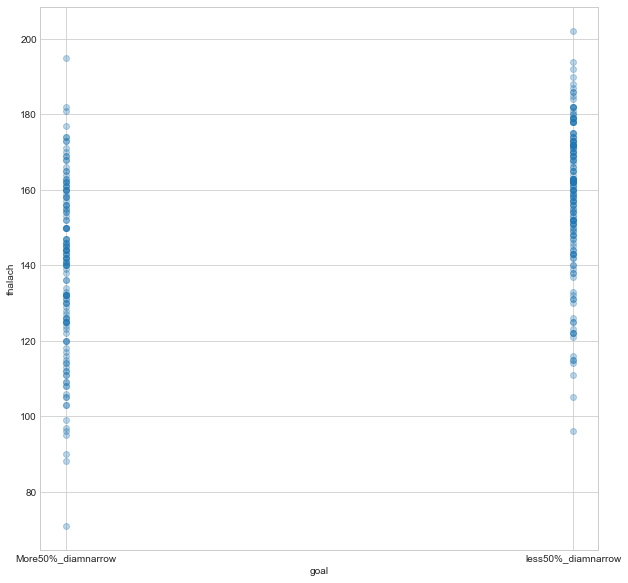

In [214]:
# Visualization of the correlation between goal x thalach

plt.figure(figsize=(10,10))
plt.xlabel('goal')
plt.ylabel('thalach')


plt.plot( df_mod['goal'], df_mod['thalach'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


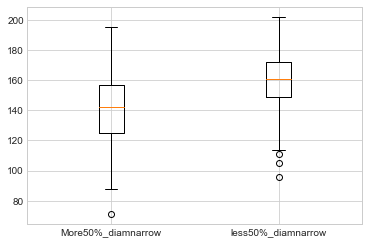

In [215]:
# Box plot to show the distribution between thalach x goal
values = []
labels = []
for goal in sorted(df_mod['goal'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['goal']==goal]['thalach'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

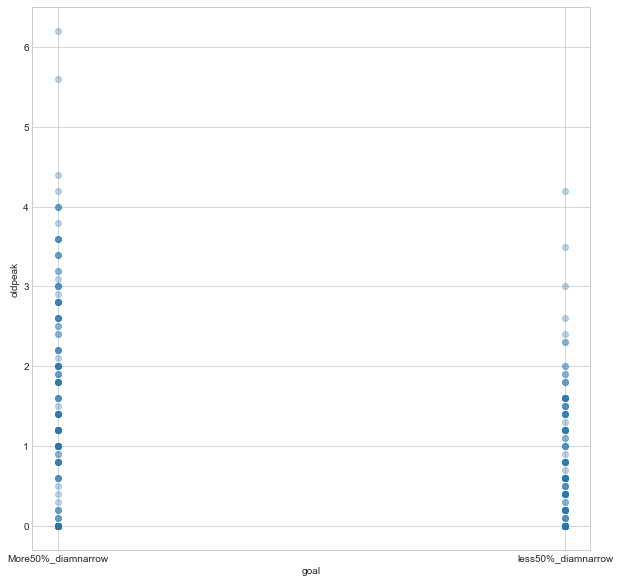

In [216]:
# Visualization of the correlation between goal x oldpeak

plt.figure(figsize=(10,10))
plt.xlabel('goal')
plt.ylabel('oldpeak')


plt.plot( df_mod['goal'], df_mod['oldpeak'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


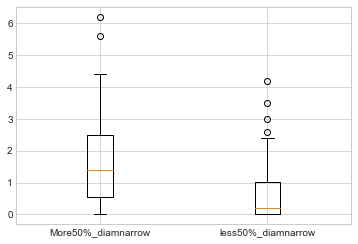

In [217]:
# Box plot to show the distribution between oldpeak x goal
values = []
labels = []
for goal in sorted(df_mod['goal'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['goal']==goal]['oldpeak'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

##### Multiple variables visualization: goal vs. categorical variables.

# TBC ...